In [1]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
# Import data (I uploaded a copy to blackboard) and see what's in it
df_func_renal = pd.read_excel('liver_data.xlsx')
df_func_renal.head()

,age,comp_liver_ind
0,18,2.44
1,19,3.86
2,19,-1.22
3,20,2.30
4,21,0.98


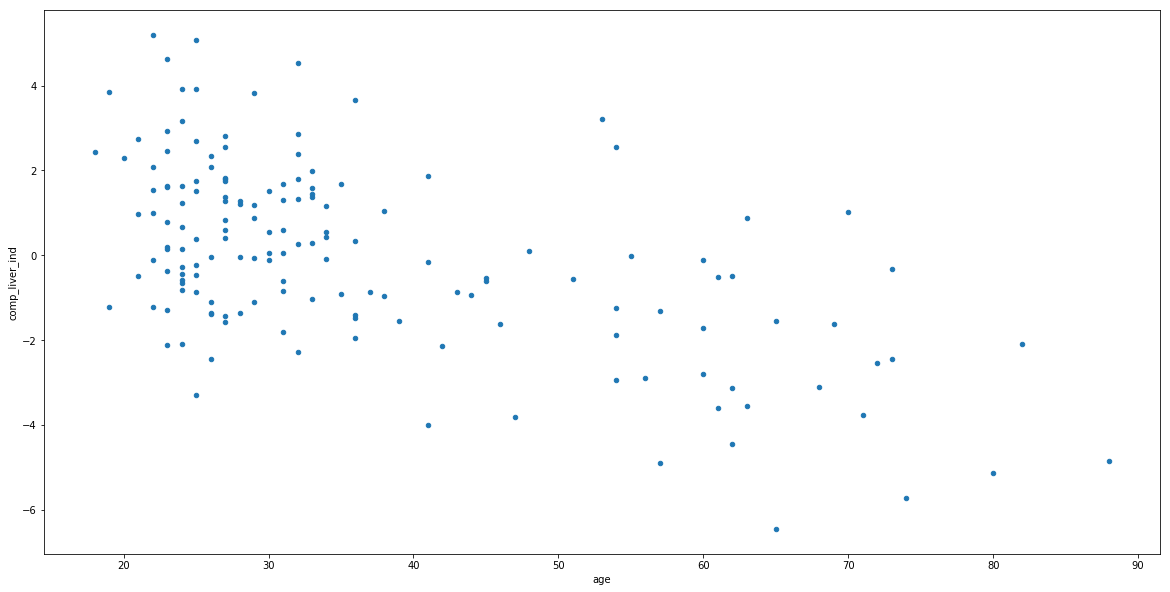

In [4]:
# As usual, plot the data...
df_func_renal.plot(x='age', y='comp_liver_ind', kind='scatter', figsize=(20,10))

In [7]:
# Fit an Ordinary Least Squares (OLS) Regression estimator
ols_reg_model = OLS(df_func_renal['comp_liver_ind'], add_constant(df_func_renal['age'])).fit()
ols_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         comp_liver_ind   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     75.31
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           5.18e-15
Time:                        11:30:37   Log-Likelihood:                -314.14
No. Observations:                 157   AIC:                             632.3
Df Residuals:                     155   BIC:                             638.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8600      0.360      7.954      0.000       2.150       3.570
age           -0.0786      0.009     -8.678      0.000      -0.096      -0.061
==============================================================================
Omnibus:                        1.091   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                1.147
Skew:                           0.194   Prob(JB):                        0.564
Kurtosis:                       2.843   Cond. No.                         99.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Fill a new dataframe column with the OLS predictions
df_func_renal['OLS_fit'] =  mod_reg_lineal.predict()

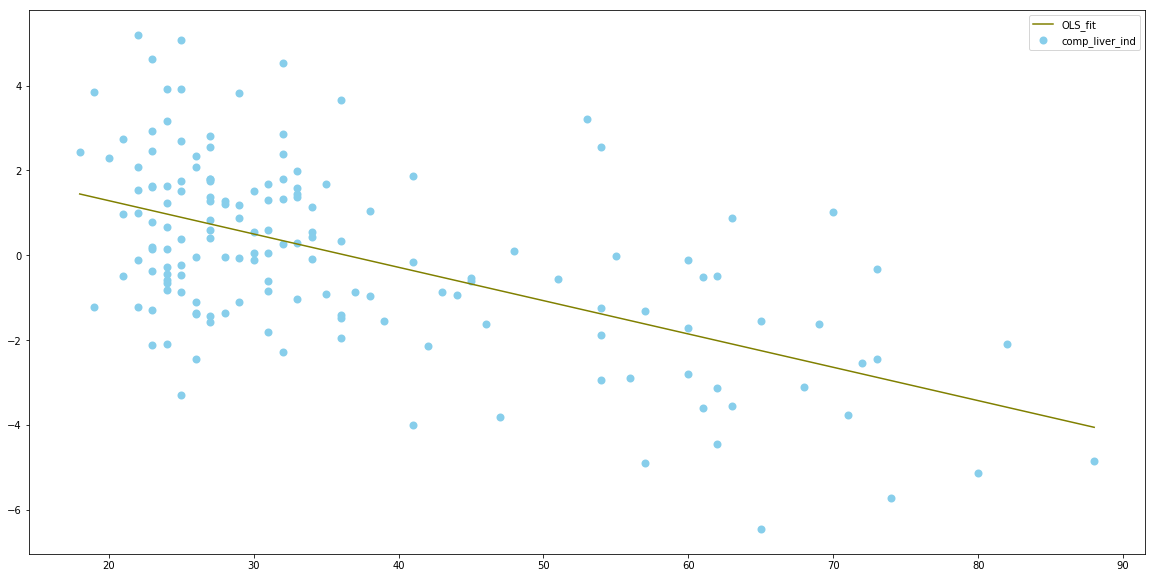

In [10]:
# Plot OLS predictions in same graph as linear model prediction
plt = matplotlib.pyplot
plt.figure(figsize=(20,10))
plt.scatter(df_func_renal['age'], df_func_renal['comp_liver_ind'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_renal['age'], df_func_renal['OLS_fit'], color='olive')
plt.legend()
plt.show()

### Now, we will compute the inference of our OLS estimates
<font size="3"> First, we will compute the **standard deviation of the residuals** </font> $\large{\hat{\sigma}_\epsilon = \Bigg[\frac{\sum{(y_i - \hat{y_i})^2}}{(N-2)}}\Bigg]^\frac{1}{2} = \large{\Bigg[\frac{\sum{\varepsilon_i^2}}{(N-2)}\Bigg]^\frac{1}{2}}$. 
<br>
<font size="3"> Recall that degrees of freedom (dof) </font> $\nu = N- 2$ <font size="3"> since we estimated 2 parameters from the data) </font>.
<br>
<font size="3"> Then, the **standard error of the forecasted value** $\hat{y}_i$ ,  </font> $\large{\hat{\sigma}_\hat{y_i} =  \hat{\sigma}_\epsilon \Bigg[\frac{1}{N} + \frac{(x_i - \bar{x})^2}{\sum{(x_i - \bar{x})^2}}\Bigg]^\frac{1}{2}}$
<br>
<font size="3"> Finally, we'll get a 2-standard prediction error (~95% two-tailed) confidence interval around each </font> $\large{\hat{y}_i}$

In [17]:
# Carrying out the calculations described above
df_func_renal['OLS_residuals'] = df_func_renal['comp_liver_ind'] - df_func_renal['OLS_fit']
N = df_func_renal['comp_liver_ind'].shape[0]
dof = N - 2
sigma_hat_epsilon = np.sqrt((df_func_renal['OLS_residuals'] ** 2).sum() / dof)
df_func_renal['forecast_se'] = sigma_hat_epsilon * (1/N + ((df_func_renal['age'] - df_func_renal['age'].mean()) ** 2 ) / (((df_func_renal['age'] - df_func_renal['age'].mean()) ** 2).sum())) ** (1/2)
df_func_renal['low_OLS_fit'] = df_func_renal['OLS_fit'] - 2 * df_func_renal['forecast_se']
df_func_renal['high_OLS_fit'] = df_func_renal['OLS_fit'] + 2 * df_func_renal['forecast_se']

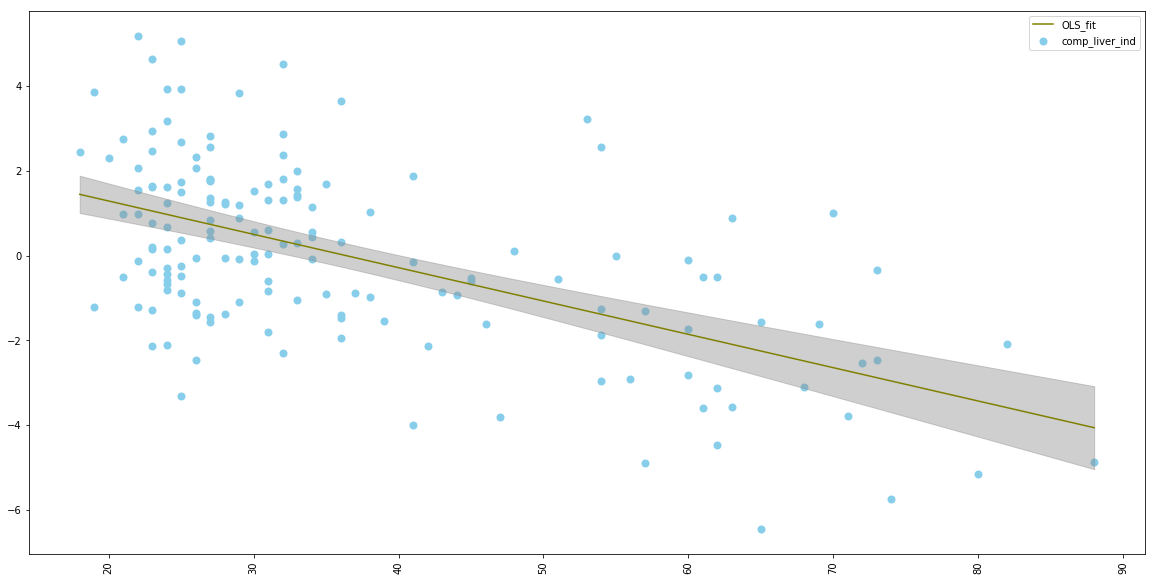

In [19]:
# Plotting forecast confidence intervals
plt = matplotlib.pyplot
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(df_func_renal['age'], df_func_renal['comp_liver_ind'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_renal['age'], df_func_renal['OLS_fit'], color='olive')
plt.fill_between(df_func_renal['age'], df_func_renal['low_OLS_fit'], df_func_renal['high_OLS_fit'], color='#888888', alpha=0.4)

plt.legend()
plt.show()

In [20]:
df_func_renal['lowess_fit'] = lowess(df_func_renal['comp_liver_ind'], df_func_renal['age'], return_sorted=False, frac=1/3) \
                                 .reshape(df_func_renal['comp_liver_ind'].shape[0],)

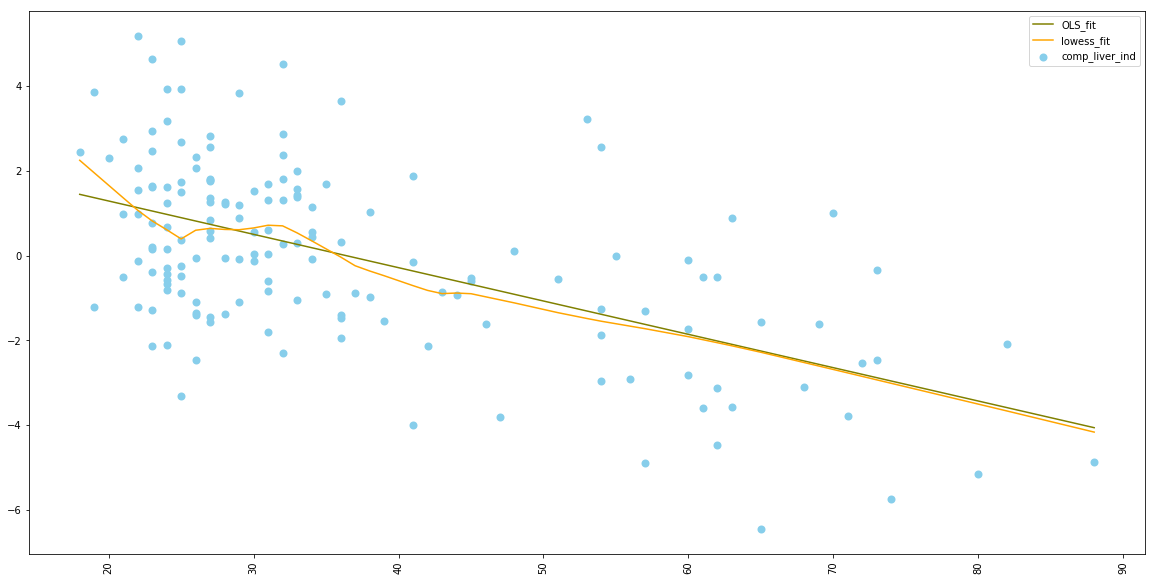

In [23]:
plt = matplotlib.pyplot
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(df_func_renal['age'], df_func_renal['comp_liver_ind'],
         marker='o', color='skyblue', linewidth=2)
plt.plot(df_func_renal['age'], df_func_renal['OLS_fit'], color='olive')
plt.plot(df_func_renal['age'], df_func_renal['lowess_fit'], color='orange')
plt.legend()
plt.show()